In [80]:
### importing libraries
import requests as requests # for calling the API
import json
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [9]:
### loading the data from your directory
with open('metadata.txt') as json_file:
    new_data = json.load(json_file)

In [10]:
len(new_data)

90360

In [11]:
new_data[1000]

{'id': '1170070980_object',
 'created': '2020-03-21T23:57:45Z',
 'modified': '2020-08-29T16:12:09Z',
 'acquisition_date_precision': '1999-12-31',
 'responsible_department': 'Samling og Forskning (KKS)',
 'credit_line': ['© Per Arnoldi'],
 'current_location_date': '0006-07-06T00:00:00Z',
 'dimensions': [{'notes': '380 x 320 mm',
   'part': 'bladmaal',
   'type': 'højde',
   'unit': 'mm',
   'value': '380'},
  {'notes': '380 x 320 mm',
   'part': 'bladmaal',
   'type': 'bredde',
   'unit': 'mm',
   'value': '320'},
  {'notes': '139 x 100 mm',
   'part': 'plademaal',
   'type': 'højde',
   'unit': 'mm',
   'value': '139'},
  {'notes': '139 x 100 mm',
   'part': 'plademaal',
   'type': 'bredde',
   'unit': 'mm',
   'value': '100'}],
 'inscriptions': [{'content': '1/10  Arnoldi', 'position': 'f.n.'}],
 'object_names': [{'name': 'akvatinte'}],
 'production': [{'creator': 'Arnoldi, Per',
   'creator_forename': 'Per',
   'creator_surname': 'Arnoldi',
   'creator_date_of_birth': '1941-01-01T00:

In [12]:
### creating a function that returns a dataframe with basic information about one art piece
def artist_row(new_data): ### has to be one art entry in a list (e.g. data[1])
    #storing the relevant information in lists
    id_number = new_data['id']
    #storing object number as list
    obj_number = new_data['object_number']
    try:
        titles = new_data['titles'][0]['title']
    except KeyError:
        titles = 'NA'
    try: 
        acq = new_data['acquisition_date_precision']
    except KeyError:
        acq = 'NA'    
   # else:
   #     acq = new_data['acquisition_date_precision']
    try:    
        display = new_data['on_display']
    except KeyError:
        dispay = 'NA'
    try:
        image = new_data['has_image']
    except KeyError:
        image = 'NA'
    try:
        techniques = new_data['techniques']
    except KeyError:
        techniques = 'NA'
    try:
        object_names = new_data['object_names'][0]['name']
        n_object_names = len(new_data['object_names'])
    except KeyError:
        object_names = 'NA'
        n_object_names = 0
    
    n_artists  = 0
    creator_name = 'NA'
    creator_gender = 'NA'
    creator_nationality = 'NA'
    try: 
        creator_name = new_data['production'][0]['creator']    
        creator_gender = new_data['production'][0]['creator_gender'] 
        creator_nationality = new_data['production'][0]['creator_nationality'] 
        n_artists  = len(new_data['production'])

    except KeyError:
        empty = "" 
    #creator_date_of_birth = new_data['production'][0]['creator_date_of_birth']
    #creator_date_of_death = new_data['production'][0]['creator_date_of_death']
    #merging the lists
    info = [id_number, obj_number, titles, acq, display, image, techniques, object_names,
        creator_name, creator_gender, creator_nationality, n_artists, n_object_names]
    ### converting into a dataframe
    df = pd.DataFrame([info], columns=['id_number','obj_number', 'titles', 'acq', 'display',
                                  'image', 'techniques', 'object_names', 'creator_name',
                                   'creator_gender', 'creator_nationality','n_artists',
                                       'n_object_names'])
    return(df)
        





In [13]:
### creating a function that returns basic information about multiple art pieces
def artists_rows(new_data):
    all_df = pd.DataFrame(columns=['id_number','obj_number', 'titles', 'acq', 'display',
                                  'image', 'techniques', 'object_names', 'creator_name',
                                   'creator_gender', 'creator_nationality','n_artists',
                                       'n_object_names'])
    length = len(new_data)
    for i in range(length):
        df = artist_row(new_data[i])
        frames = [df, all_df]
        all_df = pd.concat(frames)
    return(all_df)

In [79]:
### returning a dataframe with basic information about all of the art pieces
df = artists_rows(new_data)

KeyboardInterrupt: 

In [15]:
### exporting as a csv file
#df.to_csv(r'meta_data.csv', index = False)
df = pd.read_csv("meta_data.csv") 

In [17]:
df

,id_number,obj_number,titles,acq,display,image,techniques,object_names,creator_name,creator_gender,creator_nationality,n_artists,n_object_names
0,1170014709_object,KMS8833,Portræt af Otto Marstrands to døtre og deres v...,2017-06-28,False,True,['olie på lærred'],maleri,"Marstrand, Wilhelm",MALE,dansk,1,1
1,1170012466_object,KMS1,Titanernes fald,1621-12-31,True,True,['olie på lærred'],maleri,"Cornelisz. van Haarlem, Cornelis",MALE,hollandsk,1,1
2,1170012888_object,DEP537,Maleren i landsbyen,2007-05-08,True,True,['olie på lærred'],maleri,"Ring, L.A.",MALE,dansk,1,1
3,1170012795_object,KMS1573,Ved klaveret,1898-12-31,False,True,['olie på lærred'],maleri,"Ilsted, Peter",MALE,dansk,1,1
4,1170068403_object,KAS1008,Ryttere med hunde på vildsvinejagt,1901-12-31,False,True,['Gipsafstøbning'],relief,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90355,1170094191_object,KKSgb28913,Skitsebog 1911-1935,NaN,False,False,"['Blyant, pensel, vandfarve og hvid dækfarve']",Tegning,"Slott-Møller, Agnes",FEMALE,dansk,1,1
90356,1170059896_object,KKS858,Gadeparti med figurer. Genazzano,1891-12-31,False,False,['Blyant og sort blæk'],tegning,"Lund, F.C.",MALE,dansk,1,1
90357,1170017572_object,KKS1968-239,Portræthoved,1968-12-30,False,False,['Blyant'],tegning,"Carstensen, Ebba",FEMALE,dansk,1,1
90358,1170017541_object,KKS1986-262,Glas med blomster,1986-12-30,False,False,"['Akvarel på tyndt, gulnet papir']",akvarel,"Carstensen, Ebba",FEMALE,dansk,1,1


In [25]:
### selecting art pieces with single artists
df_single = df[df["n_artists"] == 1]
len(df_single)

68470

In [27]:
type(df_single["acq"])

pandas.core.series.Series

In [28]:
df_single['date']= pd.to_datetime(df_single['acq'], format='%Y%m%d', errors='ignore')

<ipython-input-28-06763ed40f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single['date']= pd.to_datetime(df_single['acq'], format='%Y%m%d', errors='ignore')


In [29]:
df_single_1 = df_single[df_single["date"] != 'NA']
df_single_1 = df_single[df_single["date"] >= '1621-12-31']
len(df_single_1)

67515

In [30]:
df_single_1['Acquisition Date'] = pd.to_datetime(df_single_1['acq'], errors='coerce')
acquisitions = df_single_1['Acquisition Date'].value_counts()
acquisitions_sorted = acquisitions.sort_index()

<ipython-input-30-ba43df055493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_1['Acquisition Date'] = pd.to_datetime(df_single_1['acq'], errors='coerce')


Text(0, 0.5, 'Total Number of art pieces')

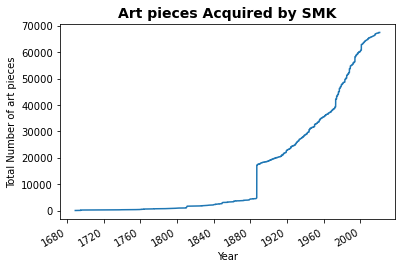

In [31]:
#https://github.com/melanieren/MoMA-analysis/blob/master/MoMA-data-analysis.ipynb
acquisitions_sorted_cumsum = acquisitions_sorted.cumsum()
ts = acquisitions_sorted_cumsum.plot()

ts.set_title('Art pieces Acquired by SMK', fontsize=14, fontweight='bold')
ts.set_xlabel("Year")
ts.set_ylabel("Total Number of art pieces")

<ipython-input-94-2b5fd2dd0a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_female['Acquisition Date'] = pd.to_datetime(df_single_female['acq'], errors='coerce')


Text(3.200000000000003, 0.5, 'Total Number of art pieces')

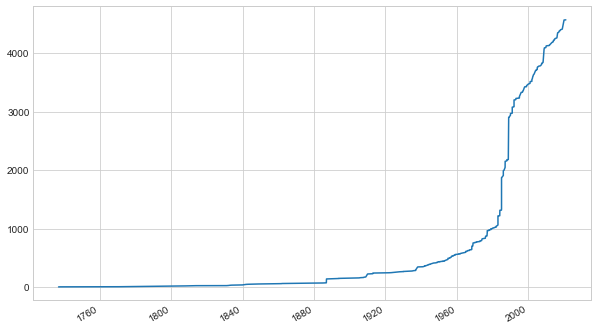

In [94]:
df_single_female = df_single[df_single["creator_gender"] == 'FEMALE']
df_single_female['Acquisition Date'] = pd.to_datetime(df_single_female['acq'], errors='coerce')
acquisitions_female = df_single_female['Acquisition Date'].value_counts()
acquisitions_sorted_female = acquisitions_female.sort_index()
acquisitions_sorted_cumsum_female = acquisitions_sorted_female.cumsum()
ts_FEMALE = acquisitions_sorted_cumsum_female.plot()

ts.set_title('Art pieces Acquired by SMK (female artists)', fontsize=14, fontweight='bold')
ts.set_xlabel("Year")
ts.set_ylabel("Total Number of art pieces")

<ipython-input-95-0102b6cc43f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_male['Acquisition Date'] = pd.to_datetime(df_single_male['acq'], errors='coerce')


Text(3.200000000000003, 0.5, 'Total Number of art pieces')

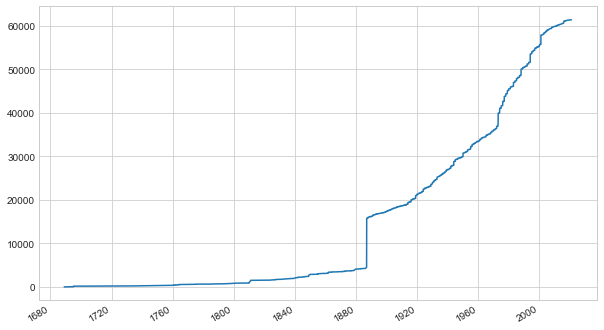

In [95]:
df_single_male = df_single[df_single["creator_gender"] == 'MALE']
df_single_male['Acquisition Date'] = pd.to_datetime(df_single_male['acq'], errors='coerce')
acquisitions_male = df_single_male['Acquisition Date'].value_counts()
acquisitions_sorted_male = acquisitions_male.sort_index()
acquisitions_sorted_cumsum_male = acquisitions_sorted_male.cumsum()
ts_male = acquisitions_sorted_cumsum_male.plot()

ts.set_title('Art pieces Acquired by SMK (male artists)', fontsize=14, fontweight='bold')
ts.set_xlabel("Year")
ts.set_ylabel("Total Number of art pieces")

In [96]:
merge_cumsum = pd.concat([acquisitions_sorted_cumsum_male, acquisitions_sorted_cumsum_female], axis=1)

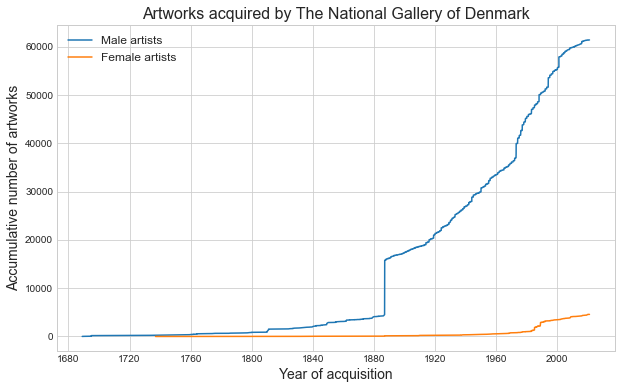

In [118]:
fig = plt.figure()
rcParams['figure.figsize'] = 10, 6
plt.plot(acquisitions_sorted_cumsum_male, label='Male artists')
plt.plot(acquisitions_sorted_cumsum_female, label='Female artists')
plt.legend(fontsize=12)
plt.xlabel('Year of acquisition', fontsize=14)
plt.ylabel('Accumulative number of artworks', fontsize=14)
plt.title('Artworks acquired by The National Gallery of Denmark', fontsize=16)

plt.savefig('gender_plot', bbox_inches='tight')

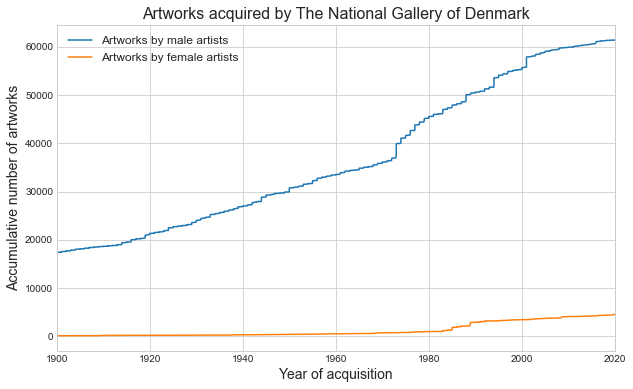

In [131]:
fig = plt.figure()
rcParams['figure.figsize'] = 10, 6
plt.plot(acquisitions_sorted_cumsum_male, label='Artworks by male artists')
plt.plot(acquisitions_sorted_cumsum_female, label='Artworks by female artists')
plt.xlim('1900', '2020')
plt.legend(fontsize=12)
plt.xlabel('Year of acquisition', fontsize=14)
plt.ylabel('Accumulative number of artworks', fontsize=14)
plt.title('Artworks acquired by The National Gallery of Denmark', fontsize=16)

plt.savefig('gender_plot_zoom', bbox_inches='tight')

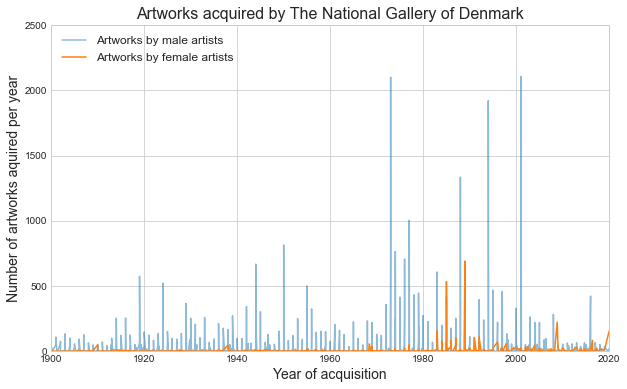

In [134]:
plt.plot(acquisitions_sorted_male, label='Artworks by male artists', alpha = 0.5)
plt.plot(acquisitions_sorted_female, label='Artworks by female artists')
plt.xlim('1900', '2020')
plt.ylim(0, 2500)
plt.legend(loc=2, fontsize=12)
plt.xlabel('Year of acquisition', fontsize=14)
plt.ylabel('Number of artworks aquired per year', fontsize=14)
plt.title('Artworks acquired by The National Gallery of Denmark', fontsize=16)

plt.savefig('gender_plot_peryear_zoom', bbox_inches='tight')